# Differentiation

Natasha Watkins

In [11]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [12]:
def f_prime(xgrid):
    x = sy.symbols('x')
    f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
    f_prime = f.diff(x)
    f_prime_np = sy.lambdify(x, f_prime, 'numpy')
    return f_prime_np(xgrid)

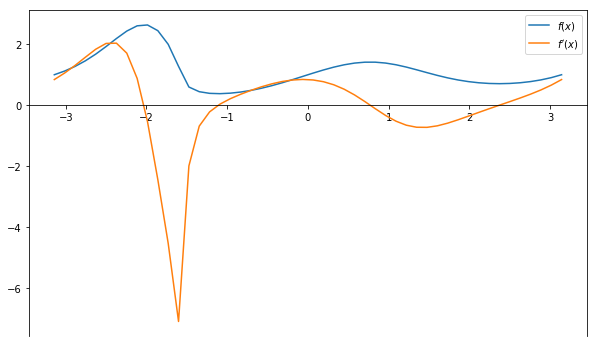

In [13]:
x_grid = np.linspace(-np.pi, np.pi)
f = lambda x: (np.sin(x) + 1)**(np.sin(np.cos(x)))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_grid, f(x_grid), label='$f(x)$')
ax.plot(x_grid, f_prime(x_grid), label='$f\'(x)$')
ax.legend()
ax.spines["bottom"].set_position("zero")
plt.show()

## Problem 2

In [14]:
def forward_1(f, x, h):
    return (f(x + h) - f(x)) / h

In [15]:
def forward_2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

In [16]:
def backward_1(f, x, h):
    return (f(x) - f(x - h)) / h

In [17]:
def backward_2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

In [18]:
def centered_2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

In [19]:
def centered_4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

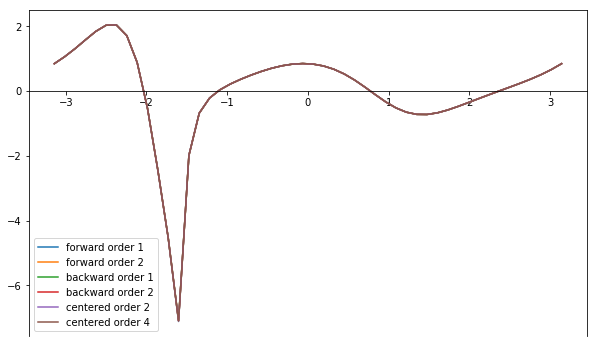

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_grid, forward_1(f, x_grid, 1e-3), label='forward order 1')
ax.plot(x_grid, forward_2(f, x_grid, 1e-3), label='forward order 2')
ax.plot(x_grid, backward_1(f, x_grid, 1e-3), label='backward order 1')
ax.plot(x_grid, backward_2(f, x_grid, 1e-3), label='backward order 2')
ax.plot(x_grid, centered_2(f, x_grid, 1e-3), label='centered order 2')
ax.plot(x_grid, centered_4(f, x_grid, 1e-3), label='centered order 4')
ax.legend()
ax.spines["bottom"].set_position("zero")
plt.show()

## Problem 2

In [21]:
def f_prime_errors(f, x0, h, quotient):
    exact = f_prime(x0)    
    approx = quotient(f, x0, h)
    errors = np.abs(exact - approx)
    return errors

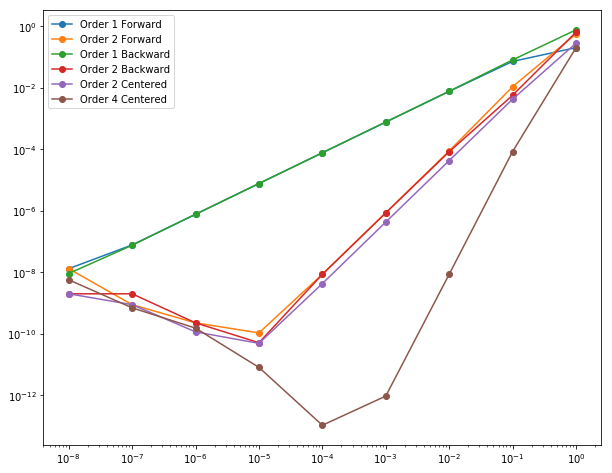

In [22]:
n = 8
h = np.logspace(-n, 0, n+1)

plt.figure(figsize=(10, 8))
plt.plot(h, f_prime_errors(f, 1, h, forward_1), '-o', label='Order 1 Forward')
plt.plot(h, f_prime_errors(f, 1, h, forward_2), '-o', label='Order 2 Forward')
plt.plot(h, f_prime_errors(f, 1, h, backward_1), '-o', label='Order 1 Backward')
plt.plot(h, f_prime_errors(f, 1, h, backward_2), '-o', label='Order 2 Backward')
plt.plot(h, f_prime_errors(f, 1, h, centered_2), '-o', label='Order 2 Centered')
plt.plot(h, f_prime_errors(f, 1, h, centered_4), '-o', label='Order 4 Centered')
plt.loglog()
plt.legend()
plt.show()

## Problem 4

In [23]:
plane = np.load('plane.npy')
t, α, β = plane[:, 0], plane[:, 1], plane[:, 2]
α, β = np.deg2rad(α), np.deg2rad(β)
x = 500 * np.tan(β) / (np.tan(β) - np.tan(α))
y = 500 * (np.tan(β) * np.tan(α)) / (np.tan(β) - np.tan(α))

In [24]:
x_prime = np.zeros_like(t)
y_prime = np.zeros_like(t)

In [25]:
# t = 7, forward difference
x_prime[0] = x[1] - x[0]
y_prime[0] = y[1] - y[0]

# centered differences
x_prime[1:-1] = x[2:] - x[1:-1]
y_prime[1:-1] = y[2:] - y[1:-1]

# t = 14, backward difference
x_prime[-1] = x[-1] - x[-2]
y_prime[-1] = y[-1] - y[-2]

Speed in metres per second

In [26]:
speeds = np.sqrt(x_prime**2 + y_prime**2)
list(zip(t, speeds))

[(7.0, 46.4242006221338),
 (8.0, 47.58095228765741),
 (9.0, 50.41813163891413),
 (10.0, 49.78306435320853),
 (11.0, 46.79843576724425),
 (12.0, 56.331436401731736),
 (13.0, 51.51480056963696),
 (14.0, 51.51480056963696)]

## Problem 5

In [27]:
def approx_jacob(f, x0, h):
    n = len(x0)
    m = len(f(x0))
    J = np.empty((m , n))
    for j in range(n):
        e = np.eye(n)[j]
        J[:, j] = (f(x0 + h * e) - f(x0 - h * e)) / (2 * h)
    return J

In [28]:
def f(xvec):
    x, y = xvec
    return np.array([x**2, x**3 - y])

In [29]:
xvec = np.array([2, 1])
approx_jacob(f, xvec, 1e-5)

array([[ 4.,  0.],
       [12., -1.]])

In [30]:
x, y = sy.symbols('x'), sy.symbols('y')
f_sy = sy.Matrix([x**2, x**3 - y])
f_sy.jacobian([x, y])

Matrix([
[   2*x,  0],
[3*x**2, -1]])

## Problem 6

In [31]:
from autograd import elementwise_grad
from autograd import numpy as anp

def T(x, n):
    
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
        
    return 2 * x * T(x, n - 1) - T(x, n - 2)

/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


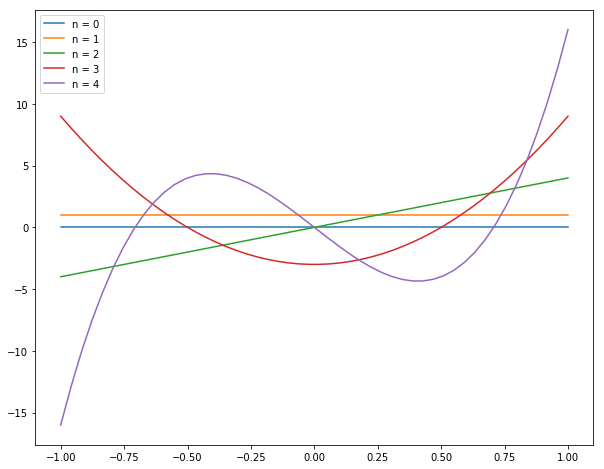

In [32]:
dc = elementwise_grad(T)
x_grid = anp.linspace(-1, 1)
n_grid = anp.arange(0, 5, 1)

plt.figure(figsize=(10, 8))
for n in n_grid:
    plt.plot(x_grid, dc(x_grid, n), label=f'n = {n}')
plt.legend()
plt.show()

## Problem 7

In [203]:
import time
from autograd import grad

def experiment(N):
    
    g = lambda x: (anp.sin(x) + 1)**(anp.sin(anp.cos(x)))
    
    errors_centered = np.zeros(N)
    errors_autograd = np.zeros(N)
    time_exact = np.zeros(N)
    time_autograd = np.zeros(N)
    time_centered = np.zeros(N)
    
    for i in range(N):
        x0 = np.random.rand()
        
        time_start_exact = time.time()
        exact = f_prime(x0)
        time_exact[i] =  time.time() - time_start_exact
        
        time_start_centered = time.time()
        errors_centered[i] = np.abs(centered_4(g, x0, 1e-3) - exact)
        time_centered[i] =  time.time() - time_start_centered
        
        df = grad(g)
        time_start_autograd = time.time()
        errors_autograd[i] = np.abs(df(x0) - exact)
        time_autograd[i] = time.time() - time_start_autograd
            
    plt.figure(figsize=(10, 6))
    plt.scatter(time_exact, 1e-18 * np.ones(N), alpha=0.4, label='SymPy', s=50)
    plt.scatter(time_centered, errors_centered, alpha=0.4, label='Difference Quotients', s=50)
    plt.scatter(time_autograd, errors_autograd, alpha=0.4, label='Difference Quotients', s=50)
    plt.legend()
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-19, 1e-11)
    plt.xlabel('Computation time (seconds)')
    plt.ylabel('Absolute Error')
    plt.show()

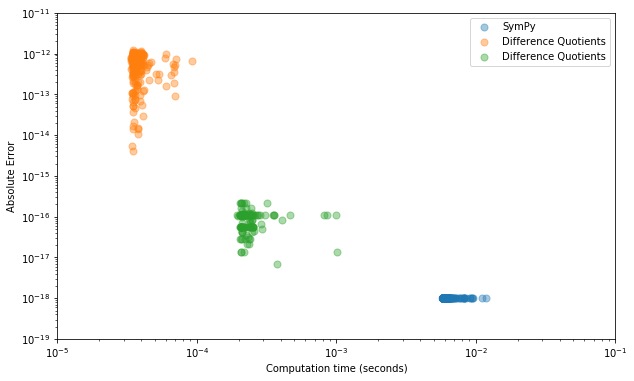

In [204]:
experiment(200)